<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/LDA_ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Discriminant Analysis (LDA)
In our previous tutorial concerning PCA in Python with Scikit-Learn, we studied how we can reduce dimensionality of the feature set using PCA. In this article we will study another very important dimensionality reduction technique: linear discriminant analysis (or LDA). But first let's briefly discuss how PCA and LDA differ from each other.

Both PCA and LDA are linear transformation techniques. However, PCA is **unsupervised** while LDA is a **supervised** dimensionality reduction technique.

PCA has no concern with the class labels. In simple words, PCA summarizes the feature set without relying on the output. PCA tries to find the directions of the maximum variance in the dataset. In a large feature set, there are many features that are merely duplicate of the other features or have a high correlation with the other features. Such features are basically redundant and can be ignored. The role of PCA is to find such highly correlated or duplicate features and to come up with a new feature set where there is minimum correlation between the features or in other words feature set with maximum variance between the features. Since the variance between the features doesn't depend upon the output, therefore PCA doesn't take the output labels into account.

Unlike PCA, LDA tries to reduce dimensions of the feature set while retaining the information that discriminates output classes. LDA tries to find a decision boundary around each cluster of a class. It then projects the data points to new dimensions in a way that the clusters are as separate from each other as possible and the individual elements within a cluster are as close to the centroid of the cluster as possible. The new dimensions are ranked on the basis of their ability to maximize the distance between the clusters and minimize the distance between the data points within a cluster and their centroids. These new dimensions form the linear discriminants of the feature set.

Let us now see how we can implement LDA using Python's Scikit-Learn.

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

## Load Dataset

In [2]:
# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..
# the original dataset would probably call this ['Species']
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# 1. Look at the data

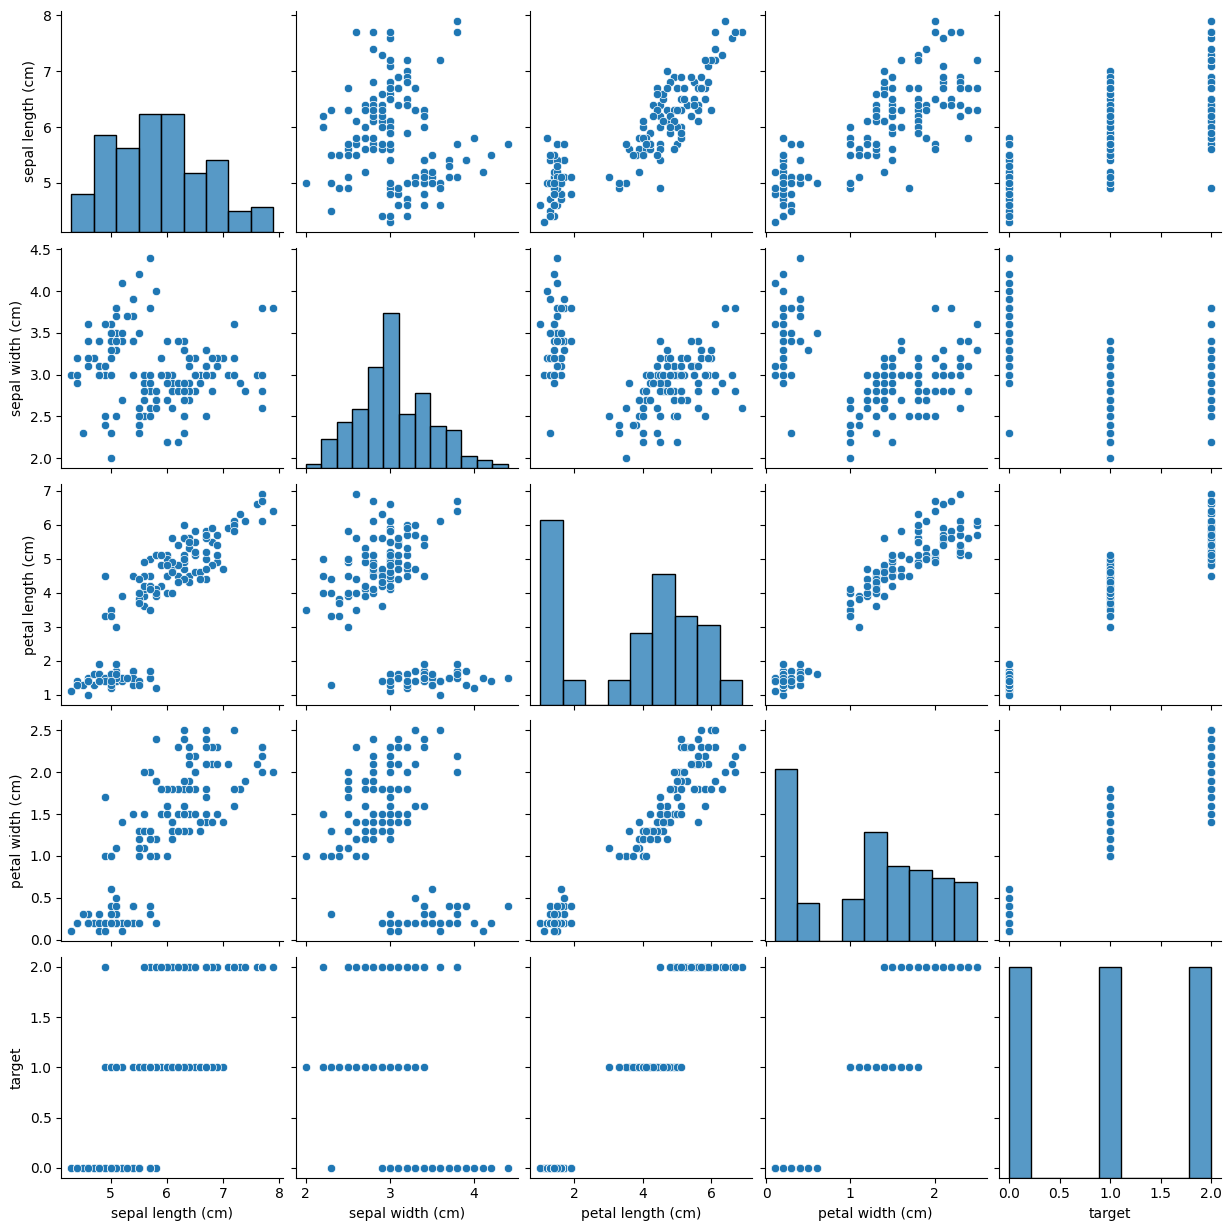

In [3]:
import seaborn as sns

sns.pairplot(data)

correlation plot?

<Axes: >

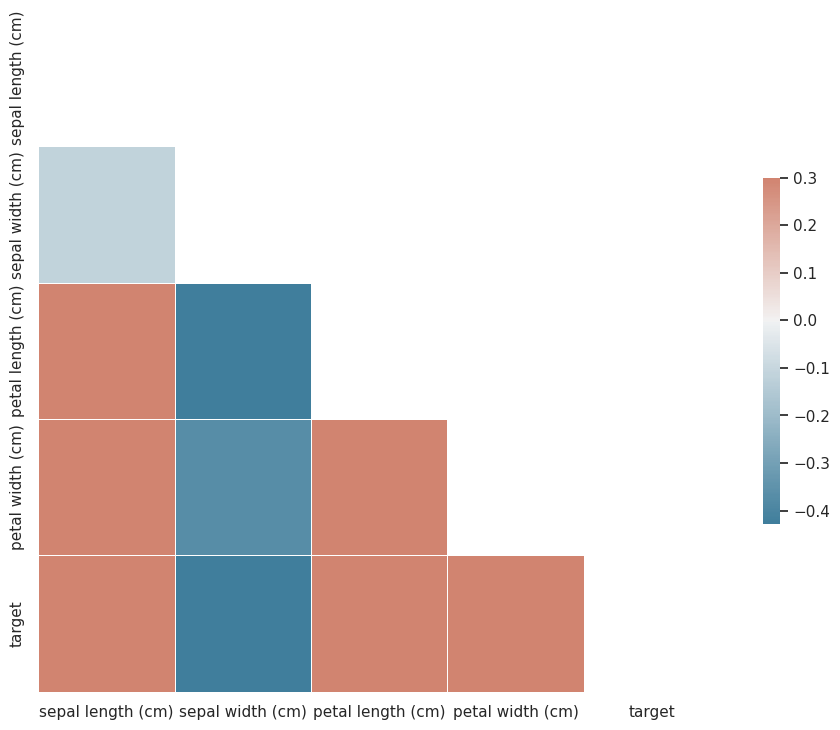

In [4]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

What do we see? Can we plot anything more?

## Step 2, perform a PCA

Follow the previous note book...

In [5]:
# scale the data
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)
data_scaled=pd.DataFrame(data_scaled,columns=data.columns)
data_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745


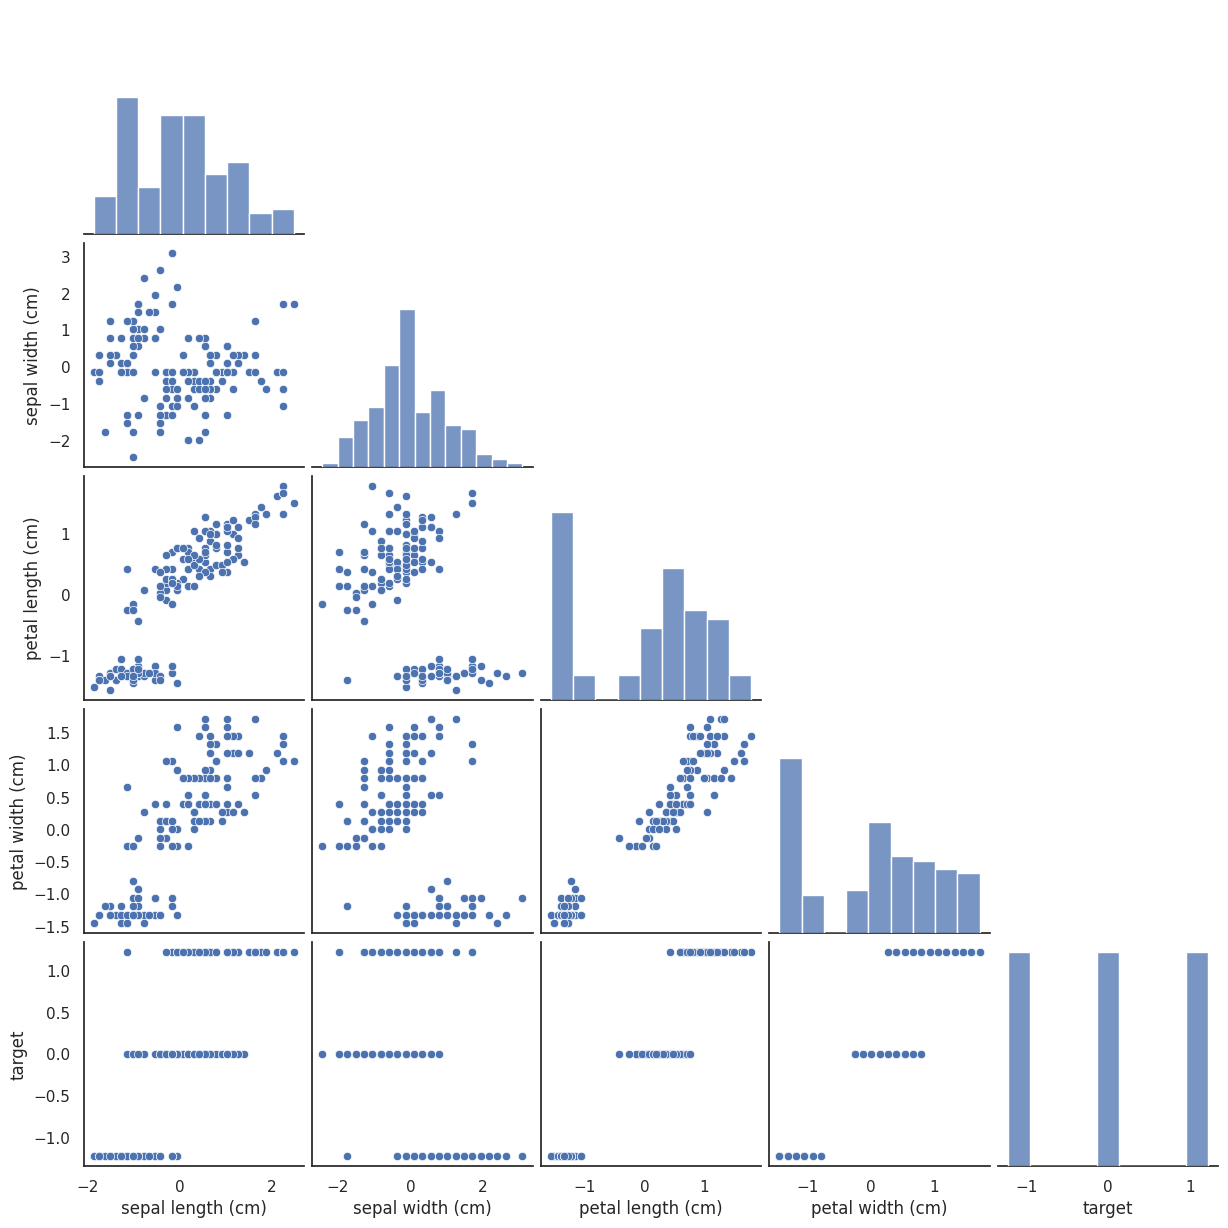

In [6]:
sns.pairplot(data_scaled, corner=True)

do the PCA

In [8]:
data_pca = PCA().fit(data_scaled)

## look at the result

In [9]:
data_pca_eigen = pd.DataFrame(
    data_pca.components_.T,
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"],
    index=data_scaled.columns,
)

# Compute the loadings
data_pca_data=pd.DataFrame()
data_pca_data["PC"]=data_pca_eigen.columns
data_pca_data["Explained Variance"] = data_pca.explained_variance_
data_pca_data["Explained Variance Ratio"] = data_pca.explained_variance_ratio_
data_pca_data.set_index('PC')

# Compute the scores
data_pca_scores = pd.DataFrame(
    data_pca.transform(data_scaled),
    columns=["PC1", "PC2", "PC3", "PC4", "PC5"],
    index=data_scaled.index,
)

In [11]:
data_pca_data

,PC,Explained Variance,Explained Variance Ratio
0,PC1,3.862770,0.767404
1,PC2,0.920272,0.182827
2,PC3,0.187476,0.037245
3,PC4,0.042369,0.008417
4,PC5,0.020671,0.004107



We start with the Explained Variance and the Explained Variance Ratio.



<Axes: xlabel='PC'>

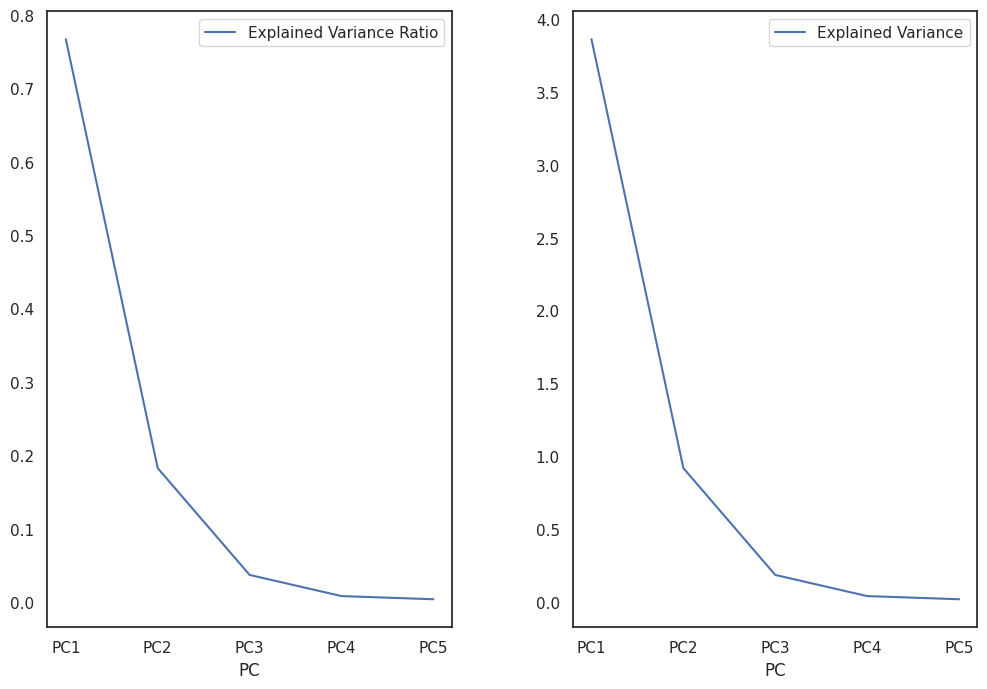

In [13]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()

data_pca_data.plot(x='PC',y='Explained Variance Ratio', ax=axs[0])

data_pca_data.plot(x='PC',y='Explained Variance', ax=axs[1])


what do we see?

We note that PC1 and PC2 explaines together a sigificant portion of the variance. Using he criterion, we can remove PC3-PC5. Let us look in more detail on PC1 and PC2.

In [14]:
data_pca_eigen

,PC1,PC2,PC3,PC4,PC5
sepal length (cm),0.444863,0.381980,-0.750625,-0.141201,0.269839
sepal width (cm),-0.233369,0.920972,0.287249,-0.003513,-0.121757
petal length (cm),0.506043,0.028717,-0.028337,0.243058,-0.826569
petal width (cm),0.496894,0.070637,0.385446,0.612583,0.473583
target,0.494624,-0.009368,0.452414,-0.738725,0.069756


<Axes: >

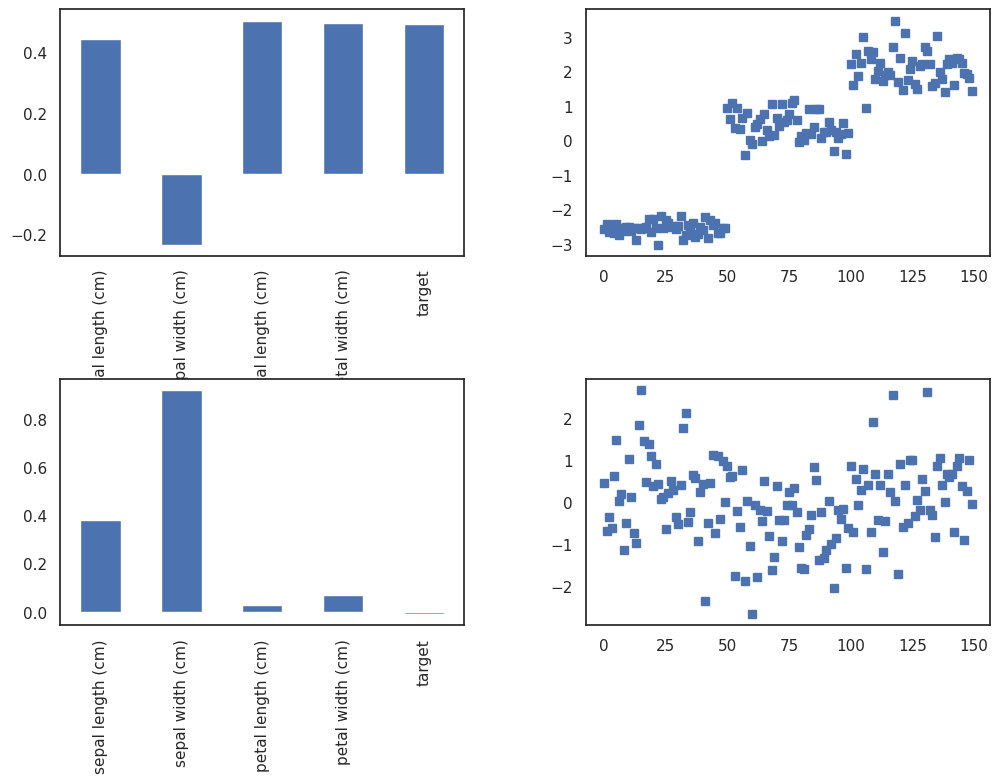

In [15]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axs = axs.ravel()
data_pca_eigen['PC1'].plot.bar(ax=axs[0])
data_pca_scores['PC1'].plot(ax=axs[1], marker='s', linestyle='None')

data_pca_eigen['PC2'].plot.bar(ax=axs[2])
data_pca_scores['PC2'].plot(ax=axs[3], marker='s', linestyle='None')


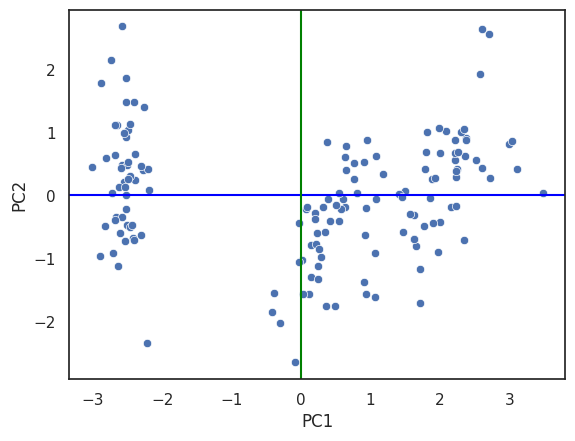

In [16]:
# Plot the scores
sns.scatterplot(data=data_pca_scores, x="PC1", y="PC2")
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

looks like we have a division in to at least two groups...

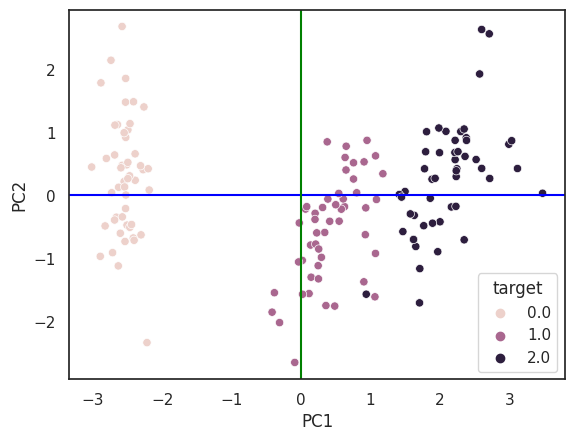

In [17]:
# Plot the scores
sns.scatterplot(data=data_pca_scores, x="PC1", y="PC2", hue=data['target'])
plt.axhline(0, color="blue")
plt.axvline(0, color="green")
plt.show()

by separating the values into the targets, we see that it is actually three.

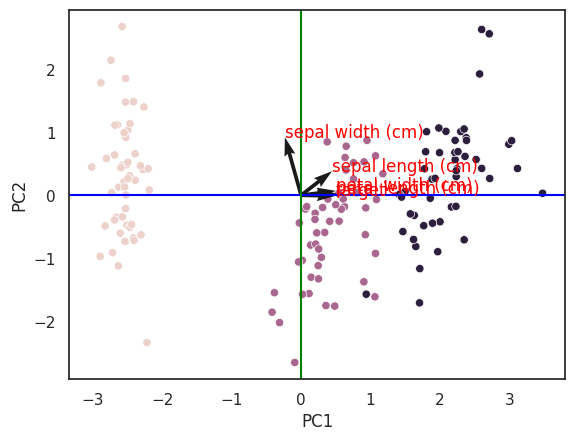

In [75]:
# Correlation Biplot
sns.scatterplot(
    data=data_pca_scores,
    x="PC1",
    y="PC2",
    hue=data['target'],
    legend=False,
)
plt.axhline(0, color="blue")
plt.axvline(0, color="green")

# plot the variables as vectors
plt.quiver(
    np.zeros(data_pca_eigen.shape[0]),
    np.zeros(data_pca_eigen.shape[0]),
    data_pca_eigen["PC1"],
    data_pca_eigen["PC2"],
    angles="xy",
    scale_units="xy",
    scale=1,
)

# Plot annotations
for i in range(data_pca_eigen.shape[0]):
    plt.text(
        data_pca_eigen["PC1"][i],
        data_pca_eigen["PC2"][i],
        data_pca_eigen.index[i],
        color="red",
    )

The plot shows the observations as points in the plane formed by two principal components (synthetic variables). Like for any scatterplot we may look for patterns, clusters, and outliers.

In addition to the observations the plot shows the original variables as vectors (arrows). They begin at the origin [0,0] and extend to coordinates given by the loading vector (see loading plot above). These vectors can be interpreted in three ways:

- The orientation (direction) of the vector, with respect to the principal component space, in particular, its angle with the principal component axes: the more parallel to a principal component axis is a vector, the more it contributes only to that PC.
- The length in the space; the longer the vector, the more variability of this variable is represented by the two displayed principal components; short vectors are thus better represented in other dimension.
- The angles between vectors of different variables show their correlation in this space: small angles represent high positive correlation, right angles represent lack of correlation, opposite angles represent high negative correlation.

# Ok let's perform a LDA
LDA is supervised


In [24]:
data_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,-1.224745
1,-1.143017,-0.131979,-1.340227,-1.315444,-1.224745
2,-1.385353,0.328414,-1.397064,-1.315444,-1.224745
3,-1.506521,0.098217,-1.283389,-1.315444,-1.224745
4,-1.021849,1.249201,-1.340227,-1.315444,-1.224745
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,1.224745
146,0.553333,-1.282963,0.705921,0.922303,1.224745
147,0.795669,-0.131979,0.819596,1.053935,1.224745
148,0.432165,0.788808,0.933271,1.448832,1.224745


In [51]:
X=data.loc[:,'sepal length (cm)':'petal width (cm)']  # funkar iloc?
y=data.loc[:,'target']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

now, let's perform the actual LDA

In [61]:
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In the script above, we have used the LinearDiscriminantAnalysis class imported earlier as LDA. We have to pass the value for the n_components parameter of the LDA, which refers to the number of linear discriminants that we want to retrieve. In this case we set the n_components to 1 (as the PCA showed that this was enough) and we first want to check the performance of our classifier with a single linear discriminant. Finally we execute the fit and transform methods to actually retrieve the linear discriminants.


Notice, in the case of LDA, the transform method takes **two parameters**: the X_train and the y_train. However in the case of PCA, the transform method only requires **one parameter** i.e. X_train. This reflects the fact that LDA takes the output class labels into account while selecting the linear discriminants, while PCA doesn't depend upon the output labels.


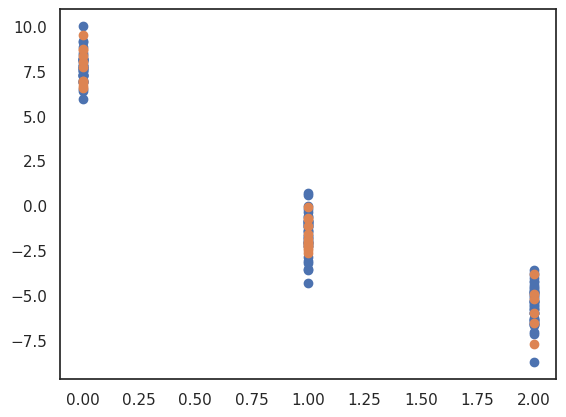

In [63]:
plt.scatter(y_train, X_train)
plt.scatter(y_test, X_test)

Ok, we know a bit more about this data set...

In [40]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

IndexError: ignored

<Figure size 640x480 with 0 Axes>

## ok, let's test two components...

In [65]:
X=data.loc[:,'sepal length (cm)':'petal width (cm)']  # funkar iloc?
y=data.loc[:,'target']

In [66]:
lda=LDA(n_components=2)
X_lda = lda.fit_transform(X,y)

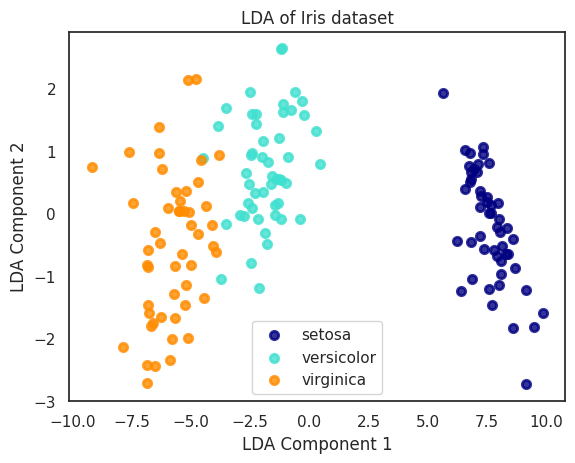

In [73]:
target_names = iris.target_names
colors = ['navy', 'turquoise','darkorange']
plt.figure()
for color, i, target_name in zip(colors, [0,1,2], target_names):
  plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color = color, alpha=0.8, lw=2, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Iris dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

